# Make directory and prepare image files
## Create a new dataset (no overwrite)
## Create directory 
## OK NG
## Inside NG create Train, Validation, in each folder , create 0,1,2,3,4,5,7
## for each NG files in each categhory, seperate train validation with 70% vs 30% , copy files to the caetgory they belong to
## copy all ok files in OK

In [2]:
import os
import numpy as np
import pickle
%matplotlib inline
import shutil

In [3]:

'''
final_dir: list conatns all the string name of end  dircetory 
final_dir_files: a dict contains mapping of mapping: element in final_dir mapping to the fiel list 
'''

final_dir =[]
final_dir_files ={}
for i in range (9):
    
    chosen_path = ('./dataset/ARY_ADJ/'+str(i))
    #chosen_path = ('/dataset/'+str(i)+'/')
    #print (chosen_path)

    for root, dirs, files in os.walk(chosen_path, topdown=True):
        if not dirs:
            final_dir.append(root)
            final_dir_files[root] = os.listdir(root)

print(final_dir)

['./dataset/ARY_ADJ/0/NG/AI', './dataset/ARY_ADJ/0/OK/AI', './dataset/ARY_ADJ/1/NG/AI', './dataset/ARY_ADJ/1/OK/AI', './dataset/ARY_ADJ/2/NG/AI', './dataset/ARY_ADJ/3/NG/AI', './dataset/ARY_ADJ/3/OK/AI', './dataset/ARY_ADJ/4/AI', './dataset/ARY_ADJ/5/AI', './dataset/ARY_ADJ/6/OK Natural/AI', './dataset/ARY_ADJ/6/OK Artificial/AI', './dataset/ARY_ADJ/7/NG/AI', './dataset/ARY_ADJ/7/OK/AI', './dataset/ARY_ADJ/8/OK/AI']


In [4]:
# check files that are not images, if yes, erase them
for key in final_dir_files.keys():
    
    print (key, '\t', len(final_dir_files[key]))
    not_jpg = [f for f in final_dir_files[key] if f[-4:] !='.jpg']
    final_dir_files[key] = [f for f in final_dir_files[key] if f not in not_jpg]


./dataset/ARY_ADJ/2/NG/AI 	 173
./dataset/ARY_ADJ/3/NG/AI 	 109
./dataset/ARY_ADJ/1/OK/AI 	 404
./dataset/ARY_ADJ/1/NG/AI 	 423
./dataset/ARY_ADJ/0/NG/AI 	 192
./dataset/ARY_ADJ/5/AI 	 409
./dataset/ARY_ADJ/6/OK Artificial/AI 	 274
./dataset/ARY_ADJ/4/AI 	 311
./dataset/ARY_ADJ/8/OK/AI 	 253
./dataset/ARY_ADJ/6/OK Natural/AI 	 135
./dataset/ARY_ADJ/7/OK/AI 	 418
./dataset/ARY_ADJ/3/OK/AI 	 301
./dataset/ARY_ADJ/0/OK/AI 	 171
./dataset/ARY_ADJ/7/NG/AI 	 258


In [5]:
'''
with open('final_dir_files.pkl','wb') as handle:
    pickle.dump(final_dir_files,handle)
'''    

"\nwith open('final_dir_files.pkl','wb') as handle:\n    pickle.dump(final_dir_files,handle)\n"

In [6]:
ok_dir = [f for f in final_dir if 'OK' in f ]
print (ok_dir)
ng_dir = [f for f in final_dir if f not in ok_dir]
print (ng_dir)

# making prefix, example: 0_NG_, 1_ok,..
ng_prefix = {}
for f in ng_dir:
    ng_prefix[f] = f[18:19] + '_NG_'
print ('\n')    
print(ng_prefix)

ok_prefix = {}
for f in ok_dir:
    ok_prefix[f] = f[18:19] + '_OK_'
print ('\n')   
print (ok_prefix)

['./dataset/ARY_ADJ/0/OK/AI', './dataset/ARY_ADJ/1/OK/AI', './dataset/ARY_ADJ/3/OK/AI', './dataset/ARY_ADJ/6/OK Natural/AI', './dataset/ARY_ADJ/6/OK Artificial/AI', './dataset/ARY_ADJ/7/OK/AI', './dataset/ARY_ADJ/8/OK/AI']
['./dataset/ARY_ADJ/0/NG/AI', './dataset/ARY_ADJ/1/NG/AI', './dataset/ARY_ADJ/2/NG/AI', './dataset/ARY_ADJ/3/NG/AI', './dataset/ARY_ADJ/4/AI', './dataset/ARY_ADJ/5/AI', './dataset/ARY_ADJ/7/NG/AI']


{'./dataset/ARY_ADJ/2/NG/AI': '2_NG_', './dataset/ARY_ADJ/3/NG/AI': '3_NG_', './dataset/ARY_ADJ/1/NG/AI': '1_NG_', './dataset/ARY_ADJ/0/NG/AI': '0_NG_', './dataset/ARY_ADJ/5/AI': '5_NG_', './dataset/ARY_ADJ/4/AI': '4_NG_', './dataset/ARY_ADJ/7/NG/AI': '7_NG_'}


{'./dataset/ARY_ADJ/1/OK/AI': '1_OK_', './dataset/ARY_ADJ/3/OK/AI': '3_OK_', './dataset/ARY_ADJ/6/OK Artificial/AI': '6_OK_', './dataset/ARY_ADJ/0/OK/AI': '0_OK_', './dataset/ARY_ADJ/8/OK/AI': '8_OK_', './dataset/ARY_ADJ/6/OK Natural/AI': '6_OK_', './dataset/ARY_ADJ/7/OK/AI': '7_OK_'}


In [7]:
'''
Create new dataset: not to overwrte for those existed
new dataset: 'dataset' + 'n', eg dataset3 
crate first layer folder: OK, NG 
create second layer folder: train, validation 
in tran and validation folder, create folder '0','1','2','3','4','5','7'
'''
cwd = os.getcwd()
print(cwd)
make_new_dir = True
first_layer= ['OK','NG']
second_layer = ['train','validation']
for i in np.arange(2,10):
    if not os.path.exists('dataset'+str(i)):
        new_dir_name = 'dataset'+str(i)
        break
        
print ('new_dir_name=',new_dir_name)
if make_new_dir: 
        os.makedirs(new_dir_name)
os.chdir('./'+new_dir_name)
for dir in first_layer:
    os.makedirs(dir)
    if dir == 'NG':
        os.chdir('./'+dir)
        print('**', os.getcwd())
        for dir2 in second_layer:
            os.makedirs(dir2)
            os.chdir('./'+dir2)   

            for i in range (9):
                if i != 6 and i != 8:
                    os.makedirs(str(i))
            os.chdir('..')
            print('----', os.getcwd())
os.chdir(cwd)
print(os.getcwd())


/notebooks
new_dir_name= dataset2
** /notebooks/dataset2/NG
---- /notebooks/dataset2/NG
---- /notebooks/dataset2/NG
/notebooks


In [8]:
'''
copy files to new dataset
src dircetory= './dataset/ARY_ADJ/'
target directory = './'+new_dir_name
file split: train and validation  (0.7 vs 0.3)
file name: add prefix, eg.: '0_NG', '1_NG' or '0_OK', '1_OK' 
'''
import shutil

def copy_files(prefix, root, file_list, t_dir):
    print (t_dir)
    for f in file_list:
        shutil.copy(os.path.join(root+'/'+f), t_dir+prefix+f)
        #print (t_dir+prefix+f)
        


In [9]:
def split_files(file_list, split=0.7):
    split_number = int(len(file_list)*split)
    select_list = np.random.choice(len(file_list),split_number,replace=False).tolist()
    select_list.sort()
    #print (len(file_list),len(select_list))
    train = [file_list[i] for i in select_list ]
    validation = [f for f in file_list if  f not in train]
    print ('len of file_list', len(file_list), 'len of train', len(train), 'len of validation', len(validation))
    
    
    return train, validation

In [10]:


# copy NG files 
# split train validation with ratio 0.7 
for key in ng_dir:
    
    #print (key)
    target_src_train =      './'+new_dir_name + '/NG/train/'+ng_prefix[key][0]+'/'
    target_src_validation = './'+new_dir_name + '/NG/validation/' + ng_prefix[key][0]+'/'
    prefix = ng_prefix[key]
    train_list,val_list = split_files(final_dir_files[key])
    #print (len(val_list))
    copy_files(prefix, key,train_list ,target_src_train)

    copy_files(prefix, key,val_list,target_src_validation)
    
    print ('NG files making completed')

len of file_list 191 len of train 133 len of validation 58
./dataset2/NG/train/0/
./dataset2/NG/validation/0/
NG files making completed
len of file_list 422 len of train 295 len of validation 127
./dataset2/NG/train/1/
./dataset2/NG/validation/1/
NG files making completed
len of file_list 172 len of train 120 len of validation 52
./dataset2/NG/train/2/
./dataset2/NG/validation/2/
NG files making completed
len of file_list 108 len of train 75 len of validation 33
./dataset2/NG/train/3/
./dataset2/NG/validation/3/
NG files making completed
len of file_list 310 len of train 217 len of validation 93
./dataset2/NG/train/4/
./dataset2/NG/validation/4/
NG files making completed
len of file_list 408 len of train 285 len of validation 123
./dataset2/NG/train/5/
./dataset2/NG/validation/5/
NG files making completed
len of file_list 258 len of train 180 len of validation 78
./dataset2/NG/train/7/
./dataset2/NG/validation/7/
NG files making completed


In [11]:

# copy ok files 

for key in ok_dir:
    
    #print (key)
    target_src=      './'+new_dir_name + '/OK/'

    prefix = ok_prefix[key]

    #print (len(val_list))
    copy_files(prefix, key,final_dir_files[key] ,target_src)

    
    print ('ok files making completed')

./dataset2/OK/
ok files making completed
./dataset2/OK/
ok files making completed
./dataset2/OK/
ok files making completed
./dataset2/OK/
ok files making completed
./dataset2/OK/
ok files making completed
./dataset2/OK/
ok files making completed
./dataset2/OK/
ok files making completed


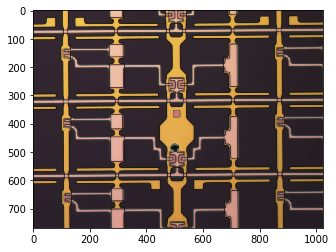

In [12]:

img = final_dir_files[ng_dir[0]][0]

import matplotlib.pyplot as plt 
im = plt.imread(ng_dir[0]+'/'+img)
plt.imshow(im)